In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [29]:
training = pd.read_csv("train.csv")
test= pd.read_csv("test.csv")

training['train_test']=  1
test['train_test']= 0
test['Survived']= np.NaN
all_data = pd.concat([training,test])

%matplotlib inline
all_data.columns






Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

<Axes: ylabel='Frequency'>

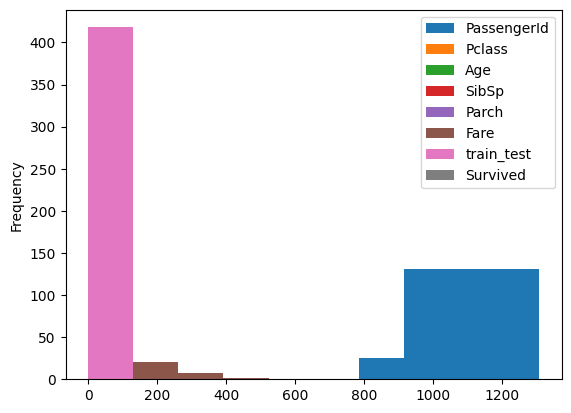

In [30]:
test.plot.hist()


In [31]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [32]:
training.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [33]:
df_num = training[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = training[['Survived', 'Pclass', 'Sex' ,'Ticket','Cabin','Embarked']]

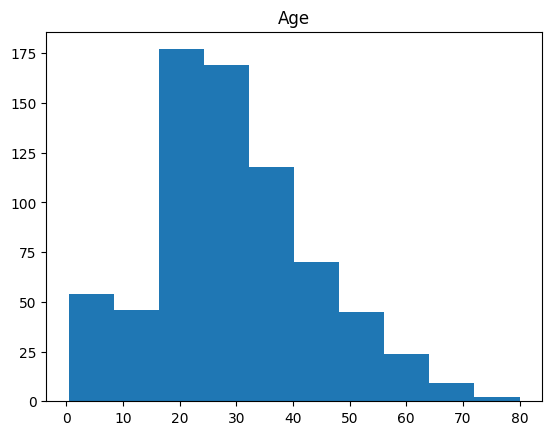

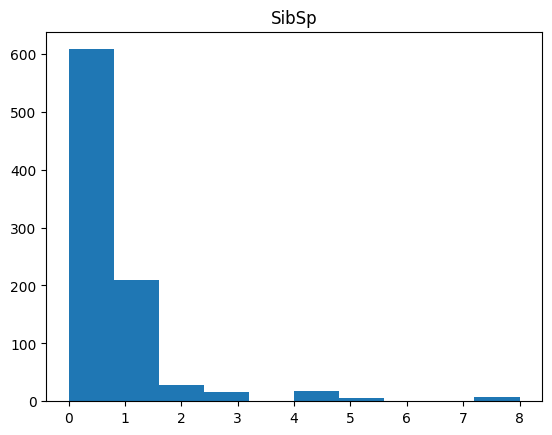

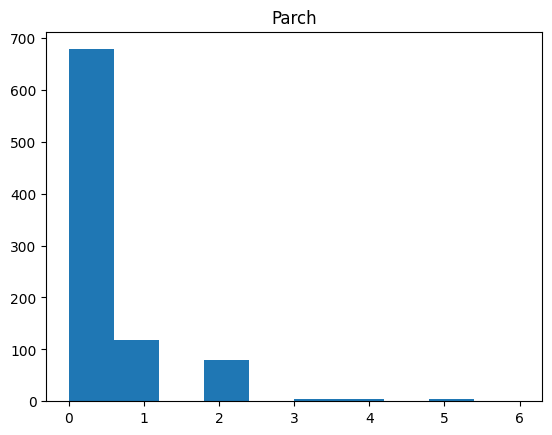

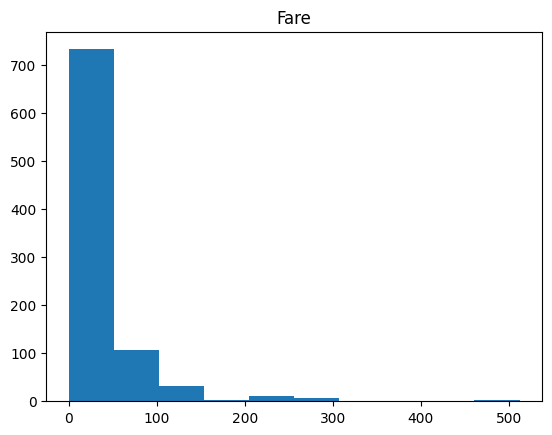

In [34]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()


            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

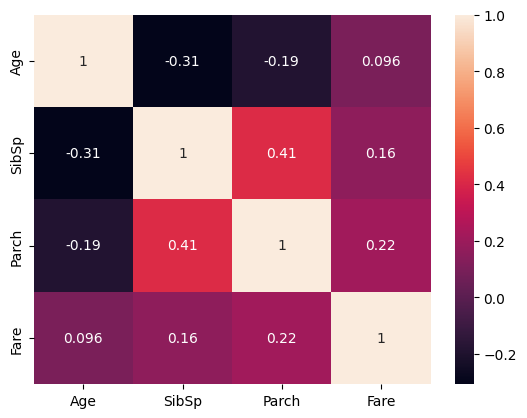

In [35]:
print(df_num.corr())
sns.heatmap(df_num.corr(),annot=True)


In [36]:
pd.pivot_table(training, index= 'Survived', values=['Age', 'SibSp', 'Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


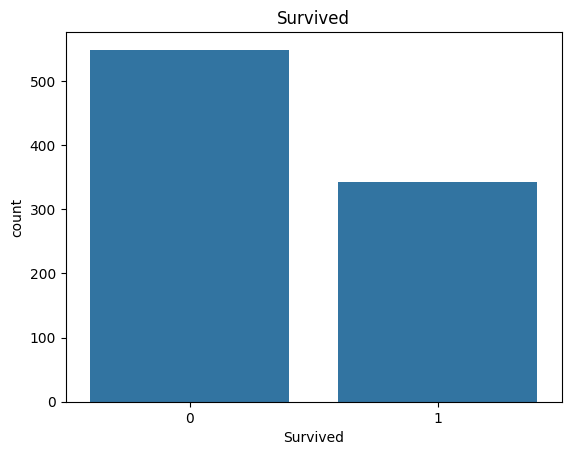

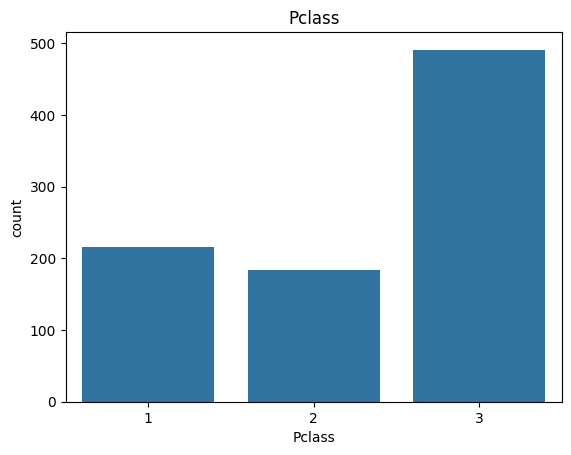

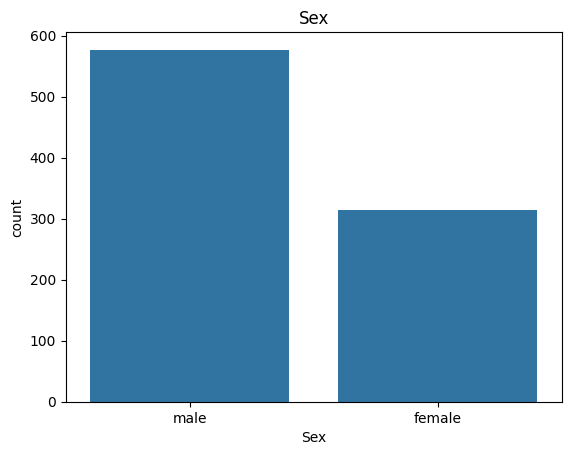

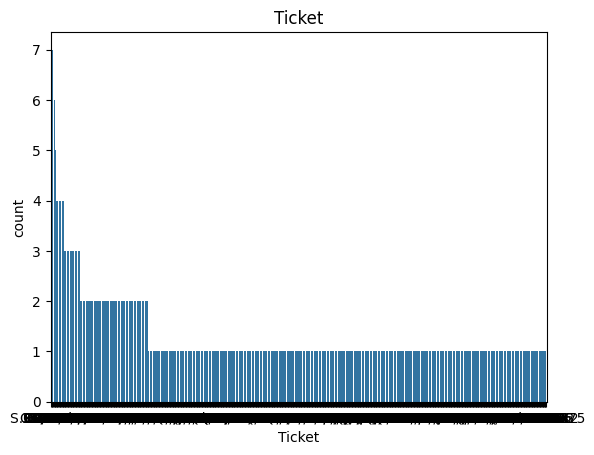

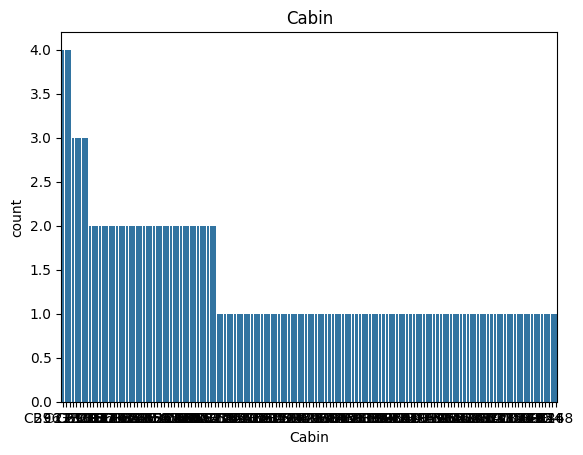

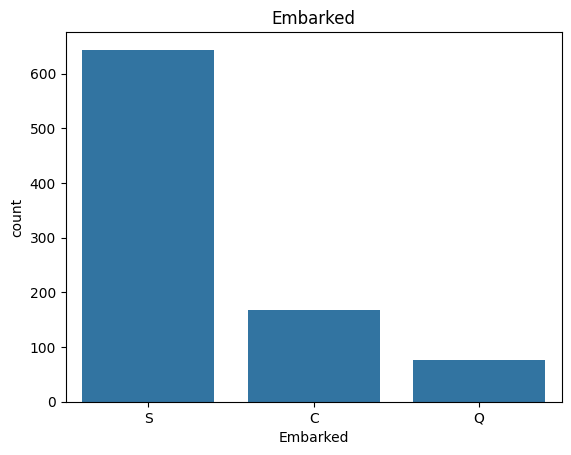

In [37]:
for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index, 
                y=df_cat[i].value_counts(), 
                ).set_title(i)
    plt.show()

In [38]:
# Comparing survival and each of these categorical variables
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Ticket', aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Ticket', aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Ticket', aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [39]:
# Create a new column 'cabin_multiple' that counts the number of cabins per passenger
training['cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

# Display the value counts to see the distribution
training['cabin_multiple'].value_counts()

cabin_multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

In [40]:
pd.pivot_table(training, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket', aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [41]:
# Creates categories based on the cabin letter (n stands for null)
# In this case we will treat null values like it's own category
training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])

# Comparing survival rate by cabin
print(training.cabin_adv.value_counts())
pd.pivot_table(training, index='Survived', columns='cabin_adv', values = 'Name', aggfunc='count')

cabin_adv
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [42]:
#understand ticket values better
#numeric vs non numeric
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [43]:
training['numeric_ticket'].value_counts()

numeric_ticket
1    661
0    230
Name: count, dtype: int64

In [44]:
#difference in numeric vs non-numeric tickets in survival rate
pd.pivot_table(training, index='Survived', columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [45]:
#difference in numeric vs non-numeric tickets in survival rate
pd.pivot_table(training, index='Survived', columns='numeric_ticket', values = 'Ticket', aggfunc='count')

#survival rate across different ticket types
pd.pivot_table(training, index='Survived', columns='ticket_letters', values = 'Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [46]:
#feature engineering on person's title
training.Name.head(50)
training['name_title'] = training.Name.apply(lambda x: x.split('.')[1].split(',')[0].strip())
#mr., ms., master. etc

# Display the distribution of titles
training['name_title'].value_counts()

name_title
John                   9
James                  7
William                6
Mary                   6
Bertha                 4
                      ..
Nora A                 1
Howard Hugh "Harry"    1
Hudson Trevor          1
Margaret               1
Karl Howell            1
Name: count, Length: 799, dtype: int64

(889,)

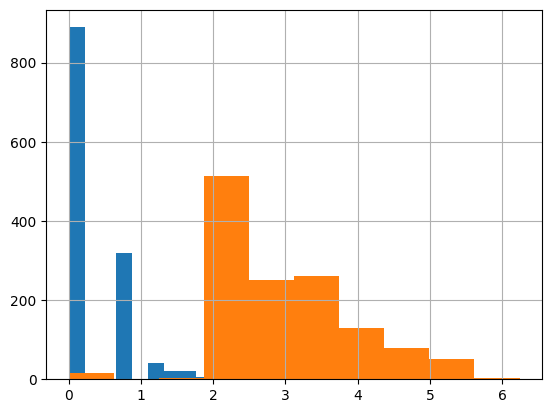

In [47]:
# Apply the same feature engineering to all_data
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split('.')[1].split(',')[0].strip())

# Impute nulls for continuous data
all_data.Age = all_data.Age.fillna(training.Age.mean())
all_data.Fare = all_data.Fare.fillna(training.Fare.mean())

# Drop null 'embarked' rows. Only 2 instances of this in training and 0 in test
all_data.dropna(subset=['Embarked'], inplace = True)

# Create normalized versions of numeric fields
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()

all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

# Convert Pclass to category for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

# Create dummy variables from categories (also can use OneHotEncoder)
all_dummies = pd.get_dummies(all_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'norm_fare', 'Embarked',
                                     'cabin_adv', 'cabin_multiple', 'numeric_ticket', 'name_title', 'train_test']])

# Split to train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis=1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis=1)

y_train = all_data[all_data.train_test==1].Survived
y_train.shape

In [48]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age', 'SibSp', 'Parch', 'norm_fare']] = scale.fit_transform(all_dummies_scaled[['Age', 'SibSp', 'Parch', 'norm_fare']])

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test==1].drop(['train_test'], axis=1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test==0].drop(['train_test'], axis=1)

y_train = all_data[all_data.train_test==1].Survived




In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [50]:
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train_scaled, y_train, cv=5)
print(cv.mean())
print(cv)



0.461201041071542
[0.40449438 0.46629213 0.49438202 0.47191011 0.46892655]


In [51]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('gnb',gnb)], voting='hard')


In [52]:
cv = cross_val_score(voting_clf, X_train_scaled, y_train, cv=5)
print(cv.mean())
print(cv)



0.461201041071542
[0.40449438 0.46629213 0.49438202 0.47191011 0.46892655]


In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [54]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

# Set up Logistic Regression with GridSearch
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled, y_train)
clf_performance(best_clf_lr, 'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.8020440551006158
Best Parameters: {'C': 0.615848211066026, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}
